In [1]:
pip install pillow


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install cgraph


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pygraphviz

  Using cached pygraphviz-1.10.zip (120 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pygraphviz
Failed to build pygraphviz
  Running setup.py install for pygraphviz: started
  Running setup.py install for pygraphviz: finished with status 'error'

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [54 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-3.9\pygraphviz
  copying pygraphviz\graphviz.py -> build\lib.win-amd64-3.9\pygraphviz
  copying pygraphviz\scraper.py -> build\lib.win-amd64-3.9\pygraphviz
  copying pygraphviz\testing.py -> build\lib.win-amd64-3.9\pygraphviz
  copying pygraphviz\__init__.py -> build\lib.win-amd64-3.9\pygraphviz
  creating build\lib.win-amd64-3.9\pygraphviz\tests
  copying pygraphviz\tests\test_attribute_defaults.py -> build\lib.win-amd64-3.9\pygraphviz\tests
  copying pygraphviz\tests\test_clear.py -> build\lib.win-amd64-3.9\pygraphviz\tests
  copying pygraphviz\tests\test_close.py -> build\lib.win-amd64-3.9\pygraphviz\tests
  copying pygraphviz\tests\test_draw

In [5]:
import networkx as nx

In [6]:
pip install pillow


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.image as mpimg
import numpy as np

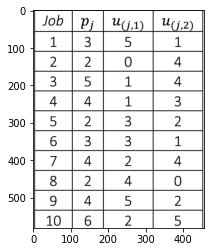

In [8]:
from PIL import Image

im = Image.open("C:/Users/Malek Moussa/Downloads/Nouveau dossier/rcpsp.png")

img = np.array(im)
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [9]:
G = nx.DiGraph() # Création d'un graphe orienté
G.add_weighted_edges_from([("S", 1,3), ("S", 2,2), ("S", 3,5), (1, 4,4), (1, 5,2), (2, 9,4), (2, 10,6), (3, 8,2), (4, 6,3),
     (4, 7,4), (5, 9,4), (5, 10,6), (6, 8,2), (6, 9,4), (7, 8,2), (8, "F",0), (9, "F",0), (10,"F",0)])

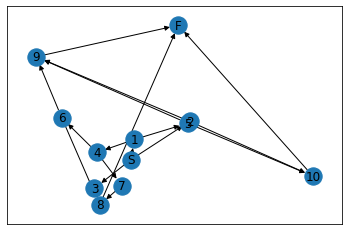

In [10]:
nx.draw_networkx(G)

In [11]:
from itertools import product
from mip import Model, xsum, BINARY

n = 10  # note there will be exactly 12 jobs (n=10 jobs plus the two 'dummy' ones)

p = [0, 3, 2, 5, 4, 2, 3, 4, 2, 4, 6, 0]

u = [[0, 0], [5, 1], [0, 4], [1, 4], [1, 3], [3, 2], [3, 1], [2, 4],
     [4, 0], [5, 2], [2, 5], [0, 0]]

c = [6, 8]

S = [[0, 1], [0, 2], [0, 3], [1, 4], [1, 5], [2, 9], [2, 10], [3, 8], [4, 6],
     [4, 7], [5, 9], [5, 10], [6, 8], [6, 9], [7, 8], [8, 11], [9, 11], [10, 11]]

(R, J, T) = (range(len(c)), range(len(p)), range(sum(p)))

model = Model()

x = [[model.add_var(name="x({},{})".format(j, t), var_type=BINARY) for t in T] for j in J]

model.objective = xsum(t * x[n + 1][t] for t in T)

for j in J:
    model += xsum(x[j][t] for t in T) == 1

for (r, t) in product(R, T):
    model += (
        xsum(u[j][r] * x[j][t2] for j in J for t2 in range(max(0, t - p[j] + 1), t + 1))
        <= c[r])

for (j, s) in S:
    model += xsum(t * x[s][t] - t * x[j][t] for t in T) >= p[j]

model.optimize()

print("Solution: ")
for (j, t) in product(J, T):
    if x[j][t].x >= 0.99:
        print("Job {}: begins at t={} and finishes at t={}".format(j, t, t+p[j]))
print("Temps Total = {}".format(model.objective_value))

Solution: 
Job 0: begins at t=0 and finishes at t=0
Job 1: begins at t=0 and finishes at t=3
Job 2: begins at t=0 and finishes at t=2
Job 3: begins at t=6 and finishes at t=11
Job 4: begins at t=3 and finishes at t=7
Job 5: begins at t=3 and finishes at t=5
Job 6: begins at t=11 and finishes at t=14
Job 7: begins at t=7 and finishes at t=11
Job 8: begins at t=14 and finishes at t=16
Job 9: begins at t=17 and finishes at t=21
Job 10: begins at t=11 and finishes at t=17
Job 11: begins at t=21 and finishes at t=21
Temps Total = 21.0


In [12]:
# Importing the matplotlib.pyplot
import matplotlib.pyplot as plt
def ressource_1():
# Declaring a figure "gnt"
    fig, gnt = plt.subplots()
 
# Setting Y-axis limits
    gnt.set_ylim(0, 5)
 
# Setting X-axis limits
    gnt.set_xlim(0, 16)
 
# Setting labels for x-axis and y-axis
    gnt.set_xlabel('Diagramme De Gantt')
    gnt.set_ylabel('R1')
 
# Setting ticks on y-axis
    gnt.set_yticks([1, 3, 5])
# Labelling tickes of y-axis
    gnt.set_yticklabels(['1', '2', '4'])
 
# Setting graph attribute
    gnt.grid(True)
 
# Declaring a bar in schedule
    gnt.broken_barh([(0, 2)], (2, 2), facecolors =('tab:orange'))
 
# Declaring multiple bars in at same level and same width
    gnt.broken_barh([(0, 3)], (1, 1),
                         facecolors ='tab:blue')
    gnt.broken_barh([(3, 2)], (2, 2),
                         facecolors ='tab:green') 
    gnt.broken_barh([(3, 4)], (1, 1.5),
                         facecolors ='tab:red')
    gnt.broken_barh([(7, 3)], (1, 1),
                         facecolors ='tab:pink')
    gnt.broken_barh([(10, 5)], (1, 2.5),
                         facecolors ='tab:cyan')
    plt.savefig("gantt1.png")

In [13]:
def ressource_2():
# Declaring a figure "gnt"
    fig, gnt = plt.subplots()
 
# Setting Y-axis limits
    gnt.set_ylim(0, 5)
 
# Setting X-axis limits
    gnt.set_xlim(0, 16)
 
# Setting labels for x-axis and y-axis
    gnt.set_xlabel('Diagramme De Gantt')
    gnt.set_ylabel('R2')
 
# Setting ticks on y-axis
    gnt.set_yticks([1, 3, 5])
# Labelling tickes of y-axis
    gnt.set_yticklabels(['1', '2', '4'])
 
# Setting graph attribute
    gnt.grid(True)
 
# Declaring a bar in schedule
    gnt.broken_barh([(0, 2)], (2, 2), facecolors =('tab:orange'))
 
# Declaring multiple bars in at same level and same width
    gnt.broken_barh([(0, 3)], (1, 3),
                         facecolors ='tab:blue')
    gnt.broken_barh([(3, 2)], (2, 1.5),
                         facecolors ='tab:green') 
    gnt.broken_barh([(3, 4)], (1, 1),
                         facecolors ='tab:red')
    gnt.broken_barh([(7, 3)], (1, 1.5),
                         facecolors ='tab:pink')
    gnt.broken_barh([(10, 3)], (1, 2.5),
                         facecolors ='tab:cyan')
    plt.savefig("gantt2.png")

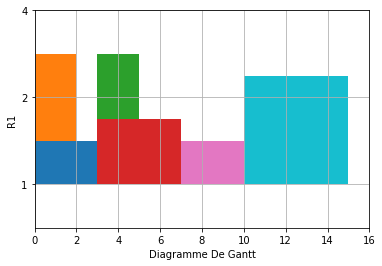

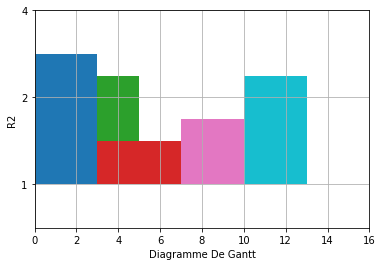

In [14]:
ressource_1()
ressource_2()

In [15]:
pip install kalis


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement kalis (from versions: none)
ERROR: No matching distribution found for kalis


In [16]:
from kalis import *


### Données
n = 9  # note there will be exactly 12 jobs (n=10 jobs plus the two 'dummy' ones)

p = [0,2,4,2,2,3,5, 0]

u = [[0,0,0,0], [2,0,1,0], [0,1,0,1], [2,0,1,0], [0,1,1,0], [1,0,0,1], [0,1,0,1], [1,0,0,0],
     [0,0,0,0]]#Nombre de ressources de type k 1, ,K nécessaires pour la tâche  j 1, ,N

c = [1,1,1,1]

S = [[1,7], [1,2], [1,4], [1, 6], [7,8], [2,3], [2, 5], [4,5], [8, 9],
     [3,9], [5,9], [6,9]]
K=4 #nombre de types de ressources
R1=2
R2=1
R3=1
R4=1
T=15

M=[[R11,0], [R12,1], [R2,0], [R3, 1], [R4,1]]
Sites=2
Temps_depl=2
Loc=[[R11,1], [R12,0], [R2,2], [R3,0], [R4,0]]
H=100


###variables

for j in range(1,n): 
  for t in range(1,T):
    X[j,t]=[1 if j <= t  else  0 ]
for j in range(1,n):
  for s in range(1,S):
    Z[j,s] =[1 if ]
for j in range(1,n):
  for h in range(1,n):
    w[j,h]= [1 if ]

    
#Contraintes



#La non préemption et la réalisation des tâches sont assurées
#Contrainte 1
for i in I:
    m += xsum(x[j][t] for j in rang(1,N)) =1
    
    
    
#déplacement est à prendre en compte (Deux tâches sont reliées par une contrainte de précédence   
#Contrainte 2
for i in I:
    m += xsum(w[j][h] for h in rang(1,N)) =1
    

    
#La contrainte 3 exprime le calcul des dates de fin des
#tâches en intégrant les temps de déplacement qui sont fonction des sites sur lesquels
#les tâches sont affectées.

#Contrainte 3
for i in I:
    m += xsum(t* x[j][t] for t in rang(1,T)) => xsum(t* x[h][t] for t in rang(1,T)) +p[j]

    
    
#Le respect des dates de fin de tâche par rapport aux tâches fictives    
#Contrainte4
for i in I:
    m += xsum(Y[j][k][r] for r in rang(1,R)) = r[j,k] for j in rang(1,N) , for k in rang(1,K)

    
#Chaque tâche est exécutée sur un seul site  
#Contrainte5 
for l in L:
    model += xsum(Z[j][s] for s in rang(1,S)) == 1


###################
(R, J, T) = (range(len(c)), range(len(p)), range(sum(p)))

model = Model()

x = [[model.add_var(name="x({},{})".format(j, t), var_type=BINARY) for t in T] for j in J]

model.objective = xsum(t * x[n + 1][t] for t in T)

for j in J:
    model += xsum(x[j][t] for t in T) == 1

for (r, t) in product(R, T):
    model += (
        xsum(u[j][r] * x[j][t2] for j in J for t2 in range(max(0, t - p[j] + 1), t + 1))
        <= c[r])

for (j, s) in S:
    model += xsum(t * x[s][t] - t * x[j][t] for t in T) >= p[j]

model.optimize()

print("Solution: ")
for (j, t) in product(J, T):
    if x[j][t].x >= 0.99:
        print("Job {}: begins at t={} and finishes at t={}".format(j, t, t+p[j]))
print("Temps Total = {}".format(model.objective_value))

ModuleNotFoundError: No module named 'kalis'